In [35]:
%matplotlib inline  
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import fiona
from fiona.crs import to_string,from_epsg
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon, shape
from shapely.prepared import prep
from itertools import chain
from mpl_toolkits.basemap.pyproj import Proj, transform
matplotlib.rcParams['figure.figsize'] = (20.0, 16.0)

In [29]:
shp = fiona.open('data/CITY_LIMITS.shp')
lat_0 = shp.crs['lat_0']
lon_0 = shp.crs['lon_0']
shp.close()
shp = fiona.open('data/SJ.shp')
extra = 0
bds = shp.bounds
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]
m = Basemap(
    projection='tmerc',
    lon_0=-121.848729129722,
    lat_0=37.3020714417266,
    ellps = 'WGS84',
    llcrnrlon=coords[0],
    llcrnrlat=coords[1],
    urcrnrlon=coords[2],
    urcrnrlat=coords[3],
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)
shp.close()

In [30]:
data = pd.read_excel('data/dumping_data.xlsx')

In [31]:
data.describe()

,id,BAS_INTERSECTION_ID,apn_lat,apn_lng,intersection_lat,intersection_lng,DISPATCHED,ENTRY_INCOMPLETE,DISP_PRIORITY,CubicYardsGC
count,20715.000000,15340.000000,8003.000000,8003.000000,15340.000000,15340.000000,20715,20715,20715,7.450000e+03
mean,532666.511127,12718.732464,36.996764,-120.939870,37.208712,-121.639322,1,0.000144823,0.0199372,1.631249e+09
std,19662.582716,8438.803313,4.396029,10.697223,3.423451,5.406255,0,0.0120336,0.139788,1.402063e+11
min,497463.000000,0.000000,-121.925560,-122.507423,-121.927660,-122.036665,True,False,False,0.000000e+00
25%,516521.500000,6544.000000,37.301988,-121.896127,37.295987,-121.889590,1,0,0,5.000000e-01
50%,533282.000000,11673.000000,37.324659,-121.863477,37.322706,-121.856706,1,0,0,1.750000e+00
75%,550288.500000,14921.000000,37.347360,-121.829147,37.347712,-121.824050,1,0,0,3.000000e+00
max,565290.000000,51895.000000,37.896717,37.303200,37.434373,37.357880,True,True,True,1.210158e+13


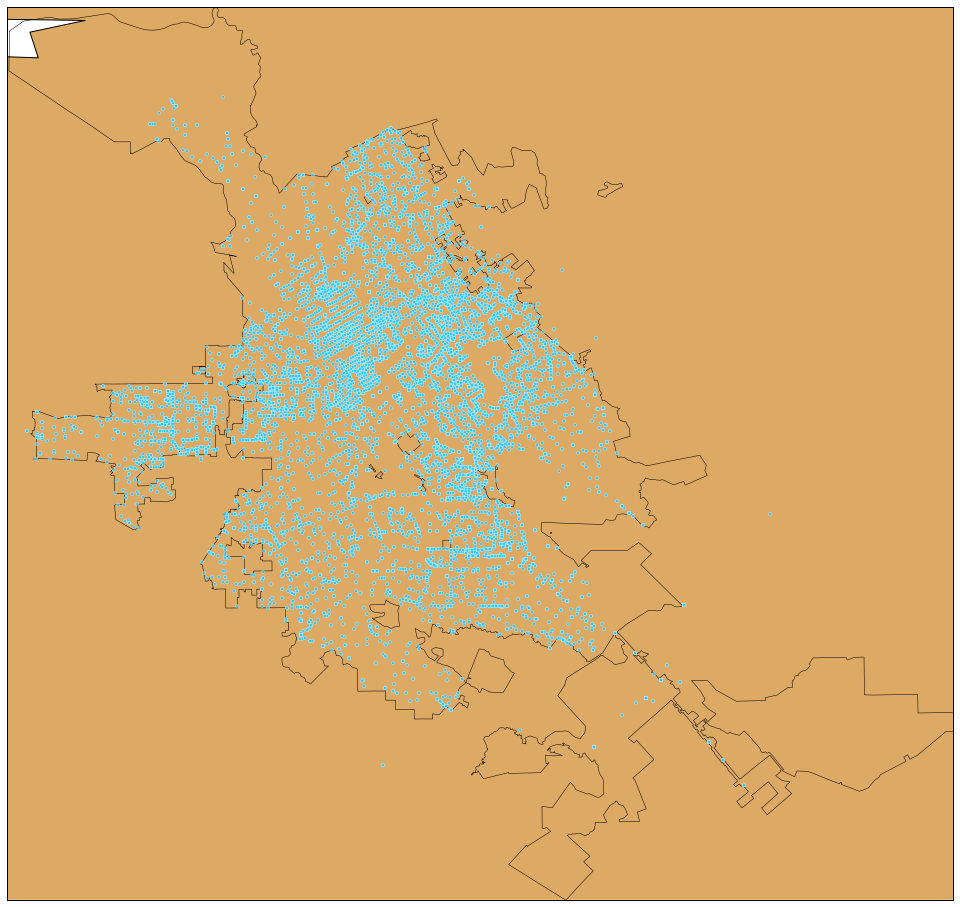

In [44]:
lat_loc = data['intersection_lat'].dropna()
lon_loc = data['intersection_lng'].dropna()
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.readshapefile('data/SJ','San Jose')
m.scatter(lon_loc.tolist(),
    lat_loc.tolist(),
    10, marker='o', lw=.25,
    facecolor='#33ccff', edgecolor='w',
    alpha=0.9, antialiased=True,
    label='Dumping Locations', zorder=3, latlon=True)